In [1]:
import Pkg
Pkg.activate(@__DIR__)
Pkg.status()

  Activating project at `~/Documents/Carnegie-Mellon/Chatterjee Group/Programming/heisenberg-model/Biquadratic.jl/analysis`


Status `~/Documents/Carnegie-Mellon/Chatterjee Group/Programming/heisenberg-model/Biquadratic.jl/analysis/Project.toml`
⌃ [13f3f980] CairoMakie v0.15.4
  [780c37f4] Carlo v0.2.5
⌃ [a93c6f00] DataFrames v1.7.0
  [f67ccb44] HDF5 v0.17.2
⌃ [033835bb] JLD2 v0.5.15
  [ebeed567] PeriodicArrays v0.1.0 `../../../PeriodicArrays.jl#main`
  [90137ffa] StaticArrays v1.9.14
Info Packages marked with ⌃ have new versions available and may be upgradable.


In [2]:
using CairoMakie
using Carlo.ResultTools
using DataFrames
using HDF5
using JLD2
using LinearAlgebra
using PeriodicArrays
using StaticArrays

In [3]:
# Parse DataFrame from ResultTools into more readily useable form
cleandata(filepath::AbstractString) = select(
    DataFrame(ResultTools.dataframe(filepath)),
    [:T, :K, :Lx, :Ly, :Mag, :Energy, :Dxπ, :Dyπ, :P, :J_s],
)

cleandata (generic function with 1 method)

In [4]:
function generatePlot(data::AbstractDataFrame, x, y; fig=Figure(), fig_pos=(1,1),
                      title, xlabel, ylabel, line=false, label="")
    fig[fig_pos...] = Axis(fig; title, xlabel, ylabel)

    vals = getfield.(data[:, y], :val)
    errs = getfield.(data[:, y], :err)
    scatter!(data[:, x], vals; label)
    if line
        lines!(data[:, x], vals)
    end
    errorbars!(data[:, x], vals, errs)

    return fig
end

function generatePlot(data::GroupedDataFrame, x, y; fig=Figure(), fig_pos=(1,1),
                      title, xlabel, ylabel, line=false)
    fig[fig_pos...] = Axis(fig; title, xlabel, ylabel)

    for key in keys(data)
        group = data[key]
        vals = getfield.(group[:, y], :val)
        errs = getfield.(group[:, y], :err)
        scatter!(group[:, x], vals, label="$(NamedTuple(key))")
        if line
            lines!(group[:, x], vals)
        end
        errorbars!(group[:, x], vals, errs)
    end

    axislegend()

    return fig
end

generatePlot (generic function with 2 methods)

In [5]:
jobname = "temp-sweep"
data = groupby(cleandata("../jobs/" * jobname * ".results.json"), [:K])

Row,T,K,Lx,Ly,Mag,Energy,Dxπ,Dyπ,P,J_s
,Float64,Float64,Int64,Int64,Measurem…,Measurem…,Measurem…,Measurem…,Measurem…,Measurem…
1,0.01,-0.005,40,40,0.00157±3.9e-5,-1.99496±2.1e-5,0.98844±0.00019,0.98842±0.00019,0.0297±0.0027,0.0298±0.0027
2,0.05,-0.005,40,40,0.003433±6.2e-5,-1.95463±6.5e-5,0.94375±0.00059,0.94372±0.00059,0.07±0.0058,0.0712±0.0059
3,0.1,-0.005,40,40,0.004789±3.7e-5,-1.90361±0.00011,0.8838±0.0014,0.8838±0.0014,0.0909±0.0068,0.0969±0.0071
4,0.125,-0.005,40,40,0.005459±3.8e-5,-1.8776±0.0001,0.8519±0.003,0.8518±0.003,0.111±0.013,0.117±0.013
5,0.15,-0.005,40,40,0.006027±3.3e-5,-1.85156±0.00012,0.8191±0.003,0.819±0.003,0.1057±0.0092,0.127±0.012
6,0.175,-0.005,40,40,0.006511±2.9e-5,-1.82544±0.00015,0.7871±0.0025,0.7871±0.0025,0.1459±0.0097,0.1499±0.0095
7,0.2,-0.005,40,40,0.007048±2.4e-5,-1.799±0.00013,0.7567±0.0041,0.7566±0.0041,0.135±0.01,0.149±0.011
8,0.225,-0.005,40,40,0.007433±2.8e-5,-1.77237±0.00015,0.7263±0.0041,0.7262±0.0041,0.1299±0.0084,0.16±0.0087
9,0.25,-0.005,40,40,0.007835±3.5e-5,-1.74552±0.00016,0.6905±0.0028,0.6903±0.0028,0.1434±0.0096,0.1709±0.0079


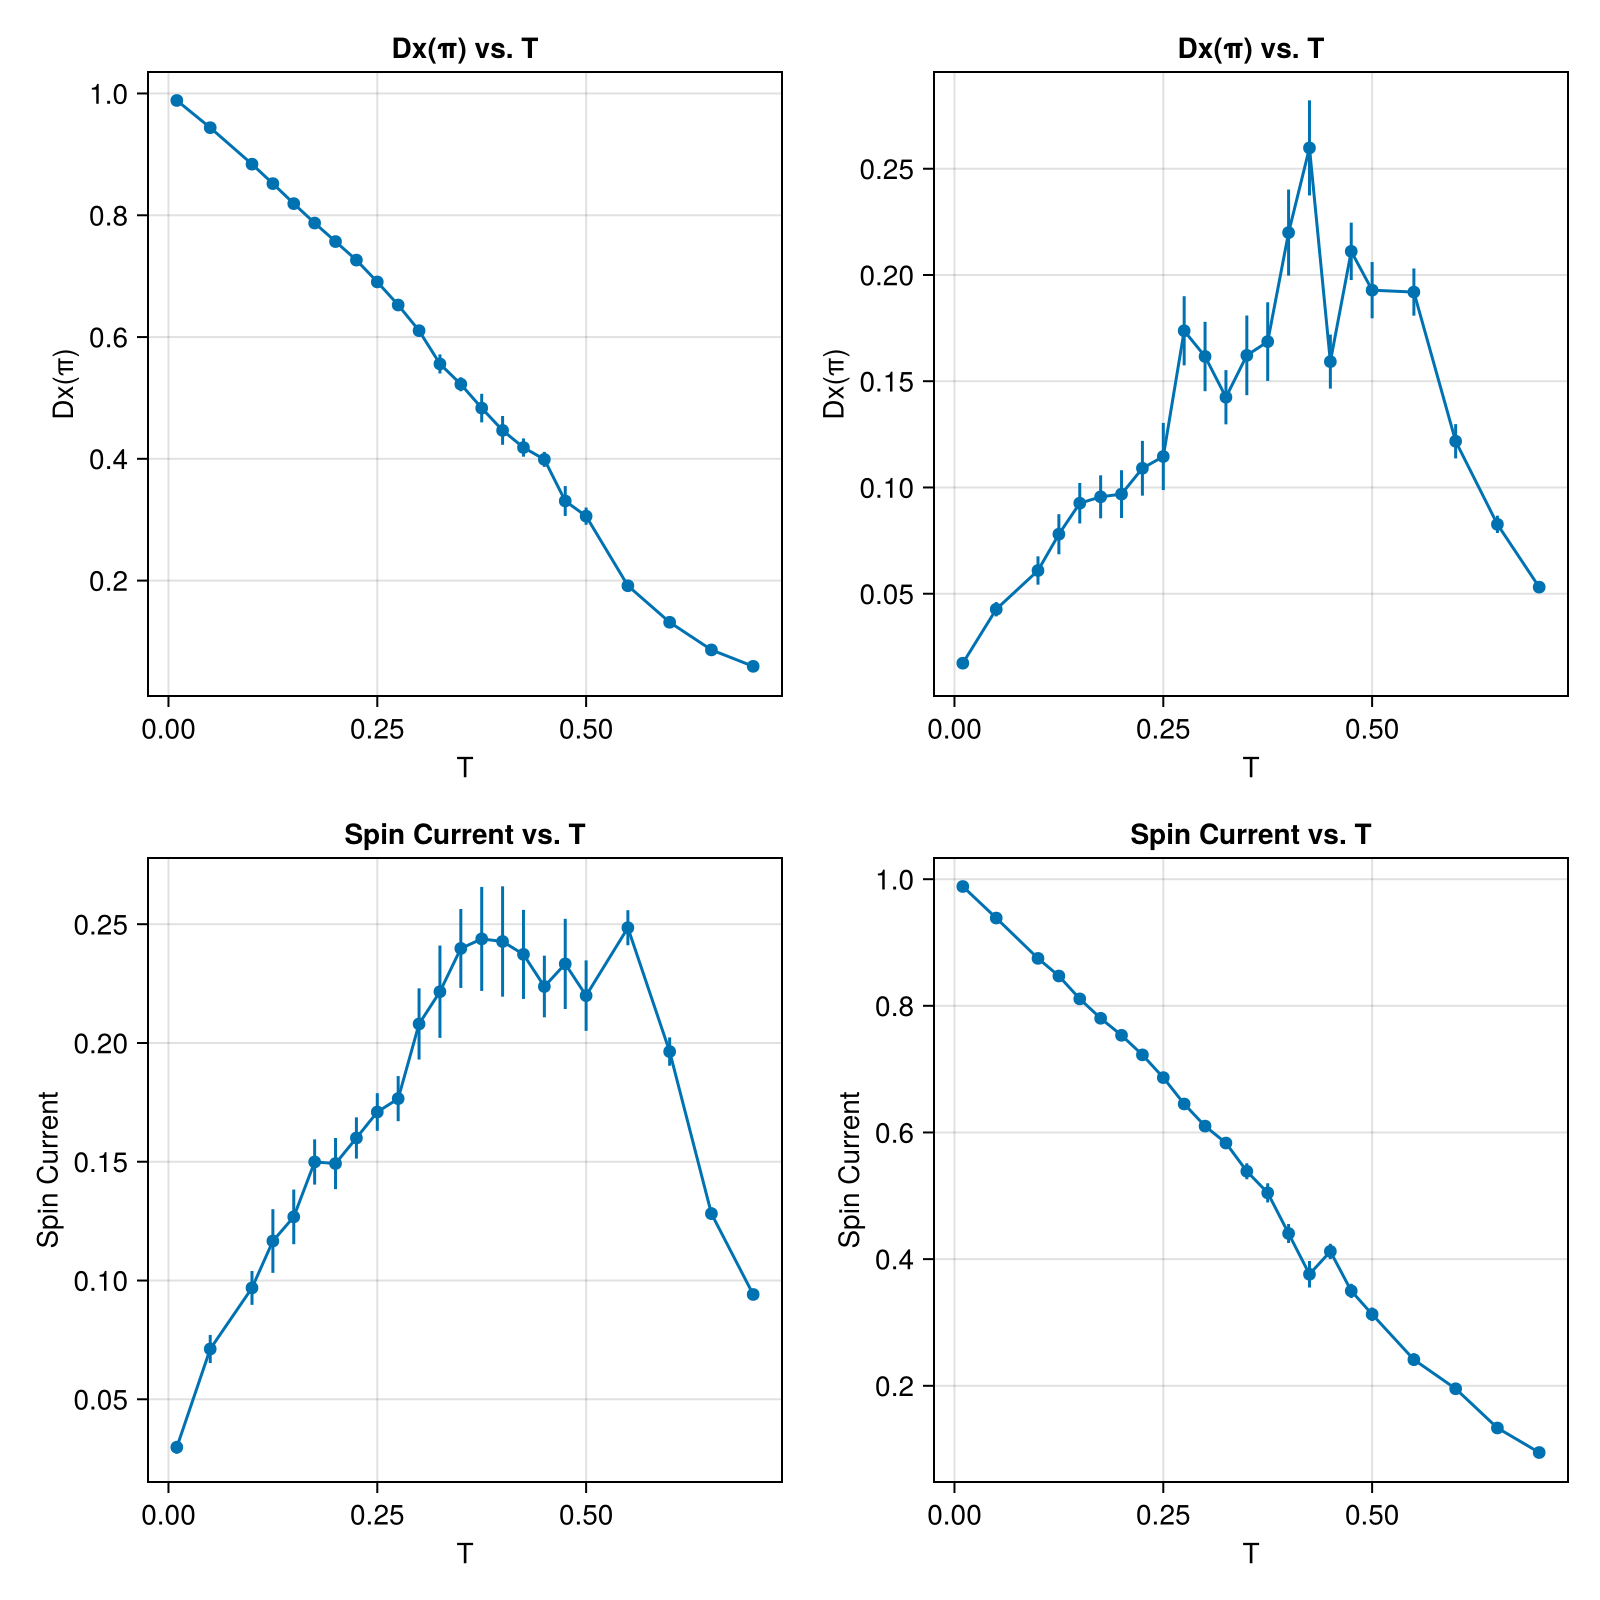

In [6]:
fig = Figure(size=(800, 800))

generatePlot(
    data[1], :T, :Dxπ; fig,
    title="Dx(π) vs. T",
    xlabel="T",
    ylabel="Dx(π)",
    line=true
)
generatePlot(
    data[2], :T, :Dxπ; fig, fig_pos=(1,2),
    title="Dx(π) vs. T",
    xlabel="T",
    ylabel="Dx(π)",
    line=true
)

generatePlot(
    data[1], :T, :J_s; fig, fig_pos=(2,1),
    title="Spin Current vs. T",
    xlabel="T",
    ylabel="Spin Current",
    line=true
)
generatePlot(
    data[2], :T, :J_s; fig, fig_pos=(2,2),
    title="Spin Current vs. T",
    xlabel="T",
    ylabel="Spin Current",
    line=true
)

# save("temp-sweep-plots/Dx-P-plots.png", fig)
fig

In [7]:
ungrouped_data = cleandata("../jobs/$jobname.results.json")

Row,T,K,Lx,Ly,Mag,Energy,Dxπ,Dyπ,P,J_s
,Float64,Float64,Int64,Int64,Measurem…,Measurem…,Measurem…,Measurem…,Measurem…,Measurem…
1,0.01,-0.005,40,40,0.00157±3.9e-5,-1.99496±2.1e-5,0.98844±0.00019,0.98842±0.00019,0.0297±0.0027,0.0298±0.0027
2,0.05,-0.005,40,40,0.003433±6.2e-5,-1.95463±6.5e-5,0.94375±0.00059,0.94372±0.00059,0.07±0.0058,0.0712±0.0059
3,0.1,-0.005,40,40,0.004789±3.7e-5,-1.90361±0.00011,0.8838±0.0014,0.8838±0.0014,0.0909±0.0068,0.0969±0.0071
4,0.125,-0.005,40,40,0.005459±3.8e-5,-1.8776±0.0001,0.8519±0.003,0.8518±0.003,0.111±0.013,0.117±0.013
5,0.15,-0.005,40,40,0.006027±3.3e-5,-1.85156±0.00012,0.8191±0.003,0.819±0.003,0.1057±0.0092,0.127±0.012
6,0.175,-0.005,40,40,0.006511±2.9e-5,-1.82544±0.00015,0.7871±0.0025,0.7871±0.0025,0.1459±0.0097,0.1499±0.0095
7,0.2,-0.005,40,40,0.007048±2.4e-5,-1.799±0.00013,0.7567±0.0041,0.7566±0.0041,0.135±0.01,0.149±0.011
8,0.225,-0.005,40,40,0.007433±2.8e-5,-1.77237±0.00015,0.7263±0.0041,0.7262±0.0041,0.1299±0.0084,0.16±0.0087
9,0.25,-0.005,40,40,0.007835±3.5e-5,-1.74552±0.00016,0.6905±0.0028,0.6903±0.0028,0.1434±0.0096,0.1709±0.0079


In [8]:
function generate_mctime_plot(task_no::Int)
    fig = Figure(size=(800, 400))

    ax_P = fig[1,1] = Axis(
        fig,
        title="P vs. Bin #",
        xlabel="Bin #",
        ylabel="P",
        xminorticksvisible=true
    )
    ax_Dxπ = fig[1,2] = Axis(
        fig,
        title="Dx(π) vs. Bin #",
        xlabel="Bin #",
        ylabel="Dx(π)",
        xminorticksvisible=true
    )

    task_str = lpad(task_no, 4, "0")
    h5open("../jobs/$jobname.data/task$task_str/run0001.meas.h5") do file
        observables = file["observables"]

        P_samples = read(observables, "P/samples")
        n = length(P_samples)
        init = 1
        lines!(
            ax_P,
            collect(init:n),
            P_samples[init:n],
            label="P"
        )
        Js_samples = read(observables, "J_s/samples")
        lines!(
            ax_P,
            collect(init:n),
            Js_samples[init:n],
            label="Spin Current"
        )
        axislegend(ax_P, position=:rb)

        Dxπ_samples = read(observables, "Dxπ/samples")
        lines!(
            ax_Dxπ,
            collect(init:n),
            Dxπ_samples[init:n],
        )
    end

    return fig
end

generate_mctime_plot (generic function with 1 method)

DataFrameRow
 Row │ T        K        Lx     Ly     Mag              Energy            Dxπ          Dyπ          P           J_s         
     │ Float64  Float64  Int64  Int64  Measurem…        Measurem…         Measurem…    Measurem…    Measurem…   Measurem…   
─────┼──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
  40 │    0.45    0.005     40     40  0.010986±3.2e-5  -1.51205±0.00022  0.159±0.013  0.159±0.013  0.261±0.02  0.412±0.012

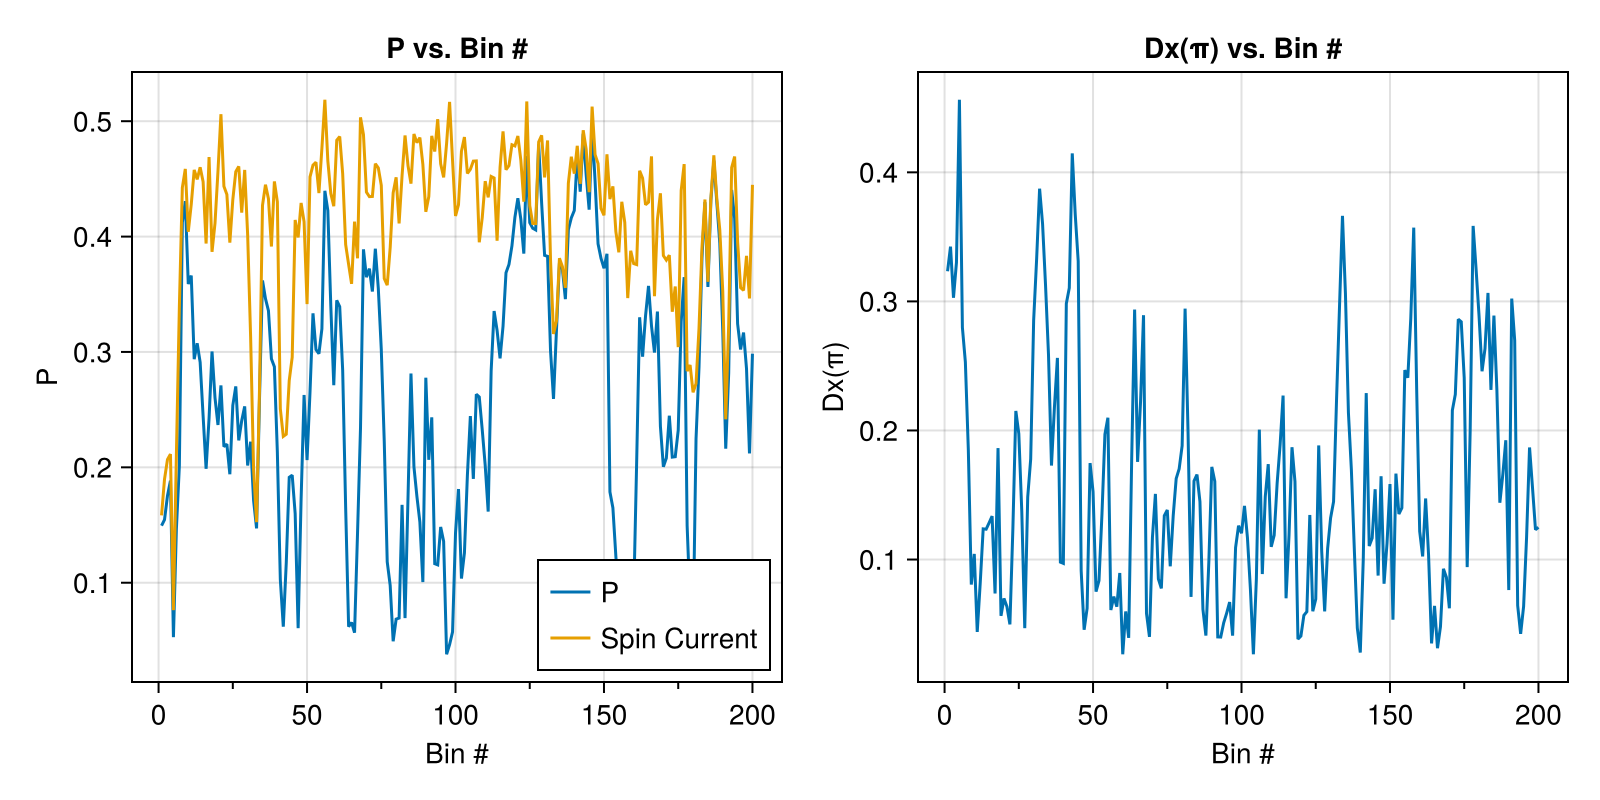

In [9]:
i = 40
print(ungrouped_data[i, :])
generate_mctime_plot(i)

In [10]:
filename = "../jobs/$jobname.data/task$(lpad(i, 4, "0"))/spins.jld2"
sweep_no = 20000

fig = Figure(size=(800, 800))
jldopen(filename, "r") do file
    spins = file["sweep$sweep_no"]
    spinxs = map(v -> v[1], spins)
    spinys = map(v -> v[2], spins)
    spinzs = map(v -> v[3], spins)
    strength = vec(spinzs)

    fig[1,1] = Axis(fig; title="Spins", backgroundcolor="black")
    arrows2d!(1:Lx, 1:Ly, spinxs, spinys, lengthscale=0.7, align=:center, color=strength, colorrange=(-1,1))
end

fig

UndefVarError: UndefVarError: `Lx` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

DataFrameRow
 Row │ T        K        Lx     Ly     Mag              Energy            Dxπ          Dyπ          P           J_s         
     │ Float64  Float64  Int64  Int64  Measurem…        Measurem…         Measurem…    Measurem…    Measurem…   Measurem…   
─────┼──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
  40 │    0.45    0.005     40     40  0.010986±3.2e-5  -1.51205±0.00022  0.159±0.013  0.159±0.013  0.261±0.02  0.412±0.012

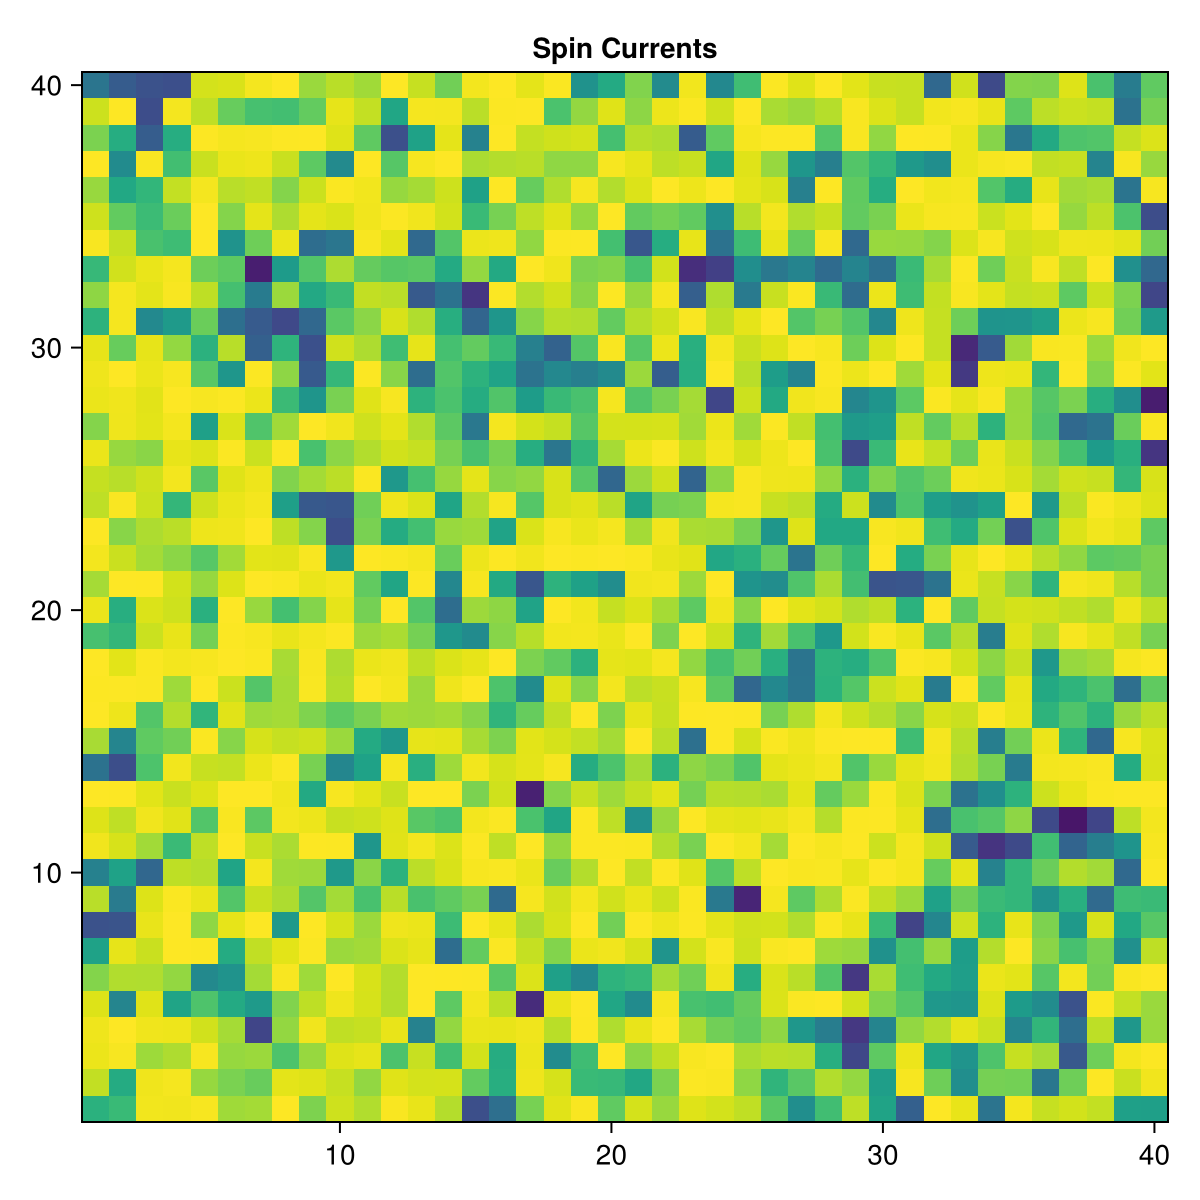

In [11]:
i = 40
print(ungrouped_data[i, :])
filename = "../jobs/$jobname.data/task$(lpad(i, 4, "0"))/spins.jld2"
sweep_no = 50000

fig = Figure(size=(600, 600))
jldopen(filename, "r") do file
    spins = PeriodicArray(file["sweep$sweep_no"])
    Lx, Ly = size(spins)
    currs = Matrix{SVector{3, Float64}}(undef, Lx, Ly)
    for y in 1:Ly
        for x in 1:Lx
            currs[x, y] = spins[x, y] × spins[x+1, y]
        end
    end
    currxs = getindex.(currs, 1)
    currys = getindex.(currs, 2)
    strength = vec(getindex.(currs, 3))

    fig[1,1] = Axis(fig; title="Spin Currents", backgroundcolor="black")
    heatmap!(norm.(currs), colorrange=(0, 1))
    # arrows2d!(1:Lx, 1:Ly, currxs, currys, lengthscale=0.7, align=:center, color=strength, colorrange=(-1,1))
end

fig